## SmartOrderEstimator - Forecasting Customer Order Amounts using Machine Learning

##### Imporing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

### Milestone 1 - Data Sanity ( by using Numpy and Pandas)

##### Step 1 Use the PRS dataset to create a dataframe`

In [3]:
# Read the CSV file 'dataset.csv' and store it in a DataFrame 'df'
df = pd.read_csv('dataset.csv')

##### Step 2: Check the description of the dataframe

In [4]:
# Print the descriptive statistics of the DataFrame 'df'
print(df.describe())

       CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE  \
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06   
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE  \
count         1.101925e+06   1.101925e+06             1.101925e+06   
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00

##### Step 3: Check the shape of the dataframe

In [5]:
# Print the shape of the DataFrame 'df'
print(df.shape)

(1101925, 16)


##### Step 4: Check the dataframe informations

In [6]:
# Print the information about the DataFrame 'df'
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

##### Step 5: Check for null values in the dataframe

In [7]:
# Print the sum of null values in each column of the DataFrame 'df'
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


##### Step 6: Replace all null values with "NaN"

In [8]:
# Replace empty strings with NaN values in the DataFrame 'df'
df.replace("", np.nan, inplace=True)

##### Step 7: Change the format of "ORDER_CREATION_DATE" column to datetime[64] with format "%Y%m%d"

In [9]:
# Change the format of the 'ORDER_CREATION_DATE' column to datetime[64] with the format "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')

# Print the updated 'ORDER_CREATION_DATE' column
print(df['ORDER_CREATION_DATE'])

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]


##### Step 8: Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" column to datetime[64] with format "%Y%m%d"

In [10]:
# Change the format of the 'REQUESTED_DELIVERY_DATE' column to datetime[64] with the format "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')

# Print the updated 'REQUESTED_DELIVERY_DATE' column
print(df['REQUESTED_DELIVERY_DATE'])

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]


##### Step 9: Sanity check - Check how many records are having order date greater than the delivery date

In [11]:
# Check the number of records where the order date is greater than the delivery date
print(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0])

27142


##### Step 10: Remove those records where order date is greater than the delivery date 

In [12]:
# Remove the records where the order date is greater than the delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

##### Step 11: Check the number of records where "ORDER_AMOUNT" field is having "-" in it.

In [13]:
# Check the number of records where the "ORDER_AMOUNT" field has "-" in it
records_with_dash = df[df["ORDER_AMOUNT"].str.contains("-")]
count_records_with_dash = len(records_with_dash)
print("Number of records with '-' in the ORDER_AMOUNT field:", count_records_with_dash)

Number of records with '-' in the ORDER_AMOUNT field: 32


##### Step 12: Replace "-" with "" in the "ORDER_AMOUNT" field.

In [14]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-", "")

##### Step 13: Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [15]:
print(df[df['ORDER_AMOUNT'].str.contains(',')].shape[0])

1073406


##### Step 14: Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [16]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

##### Step 15: Count the number of records where the order date and the delivery date are same

In [17]:
print(df[df['ORDER_CREATION_DATE'].dt.date == df['REQUESTED_DELIVERY_DATE'].dt.date].shape[0])

100437


##### Step 16: Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [18]:
print(df['ORDER_CURRENCY'].value_counts())

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


##### Step 17: Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [19]:
# Exchange rates dictionary
exchange_rates = {
    'USD': 1,
    'EUR': 1.08,
    'AUD': 0.65,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.045,
    'HU1': 0.0029,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

# Convert ORDER_AMOUNT to float and calculate amount_in_usd using exchange rates
df['amount_in_usd'] = df['ORDER_AMOUNT'].astype(float) * df['ORDER_CURRENCY'].map(exchange_rates)


##### Step 18: Check for values “0” in the “'amount_in_usd” column. 

In [20]:
print(df[df['amount_in_usd'] == 0].shape[0])

237821


##### Step 19: Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [21]:
# Generate unique customer IDs based on 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['unique_cust_id'] = df.groupby(['CUSTOMER_NUMBER', 'COMPANY_CODE']).cumcount().astype(str)
print(df['unique_cust_id'])

0            0
1            1
2            0
3            0
4            0
          ... 
1101920     90
1101921     91
1101922    766
1101923    767
1101924     92
Name: unique_cust_id, Length: 1074783, dtype: object


### Milestone 2 - EDA

##### Step 1: Create a Histogram on DISTRIBUTION_CHANNEL

In [22]:
# Set the figure size
plt.figure(figsize=(150, 35))

# Create a histogram plot of the 'DISTRIBUTION_CHANNEL' column
sns.histplot(data=df, x='DISTRIBUTION_CHANNEL', color='skyblue', edgecolor='white')

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Distribution Channel', fontsize=150)
plt.ylabel('Frequency', fontsize=150)
plt.title('Histogram of Distribution Channel', fontsize=224)

# Rotate the x-axis tick labels and set font size
plt.xticks(rotation=90, fontsize=25)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

##### Step 2: Create a Pie Chart on ORDER_CURRENCY

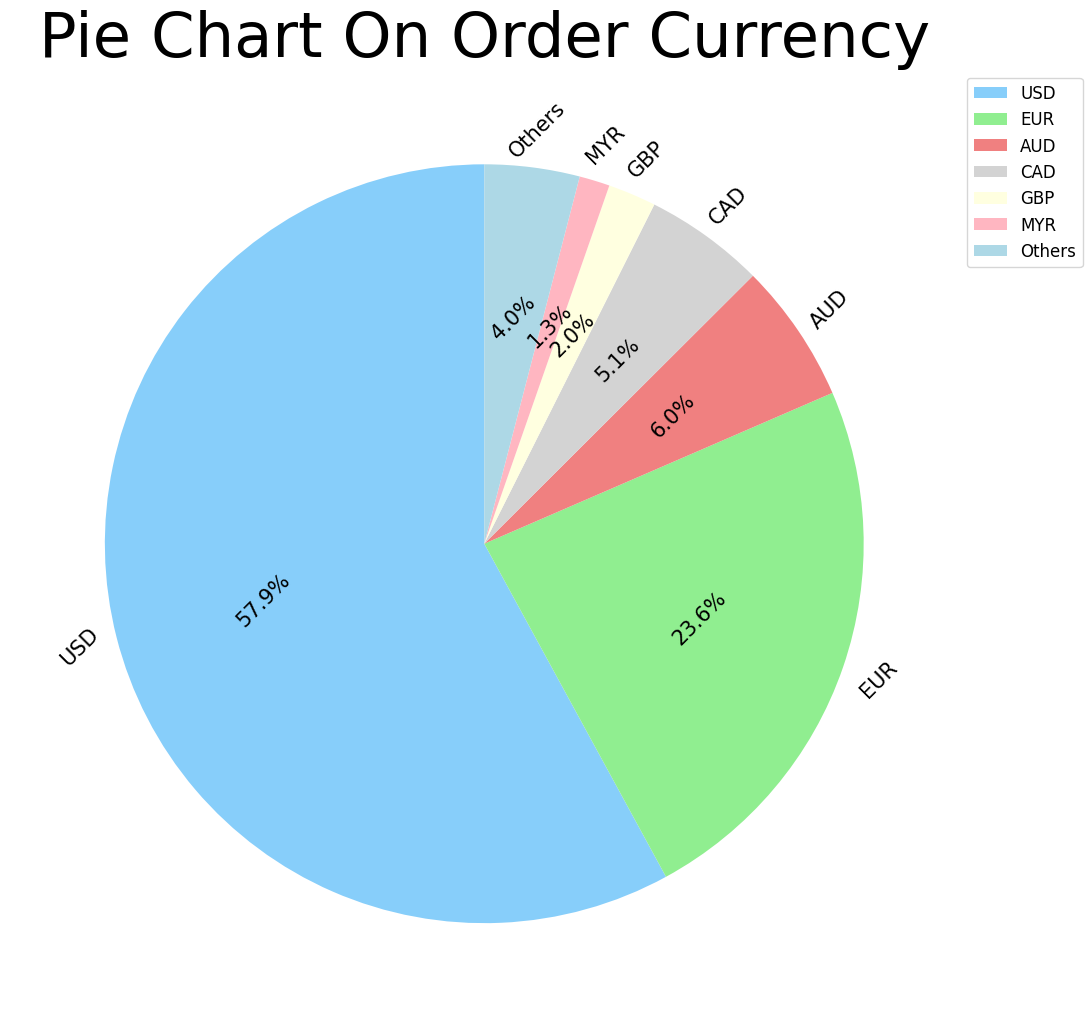

In [23]:
# Get the count of each currency type
curr = df['ORDER_CURRENCY'].value_counts()

# Select the top n currencies and combine the rest as 'Others'
n = 6
topCurr = curr[:n]
others = curr[n:].sum()
topCurr['Others'] = others

# Define colors for the pie chart
colors = ['lightskyblue', 'lightgreen', 'lightcoral', 'lightgray', 'lightyellow', 'lightpink', 'lightblue']

# Create a pie chart of the top currencies
plt.figure(figsize=(11, 11))
plt.pie(topCurr.values, labels=topCurr.index, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'rotation': 45, 'ha': 'center', 'fontsize': 15})
plt.title('Pie Chart On Order Currency', fontsize=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

##### Step 3: Create a line chart on PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

In [24]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(150, 35))

# Create a line plot of Purchase Order Type vs Distribution Channel
sns.lineplot(data=df, x='DISTRIBUTION_CHANNEL', y='PURCHASE_ORDER_TYPE', ax=ax)

# Set the x-axis label, y-axis label, and plot title
ax.set_xlabel('Distribution Channel', fontsize=124)
ax.set_ylabel('Purchase Order Type', fontsize=124)
ax.set_title('Line Plot of Purchase Order Type vs Distribution Channel', fontsize=224)

# Rotate the x-axis tick labels and set font size
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

# Display the plot
plt.show()

##### Step 4: Create a line plot on ORDER_CREATION_DATE and amount_in_usd

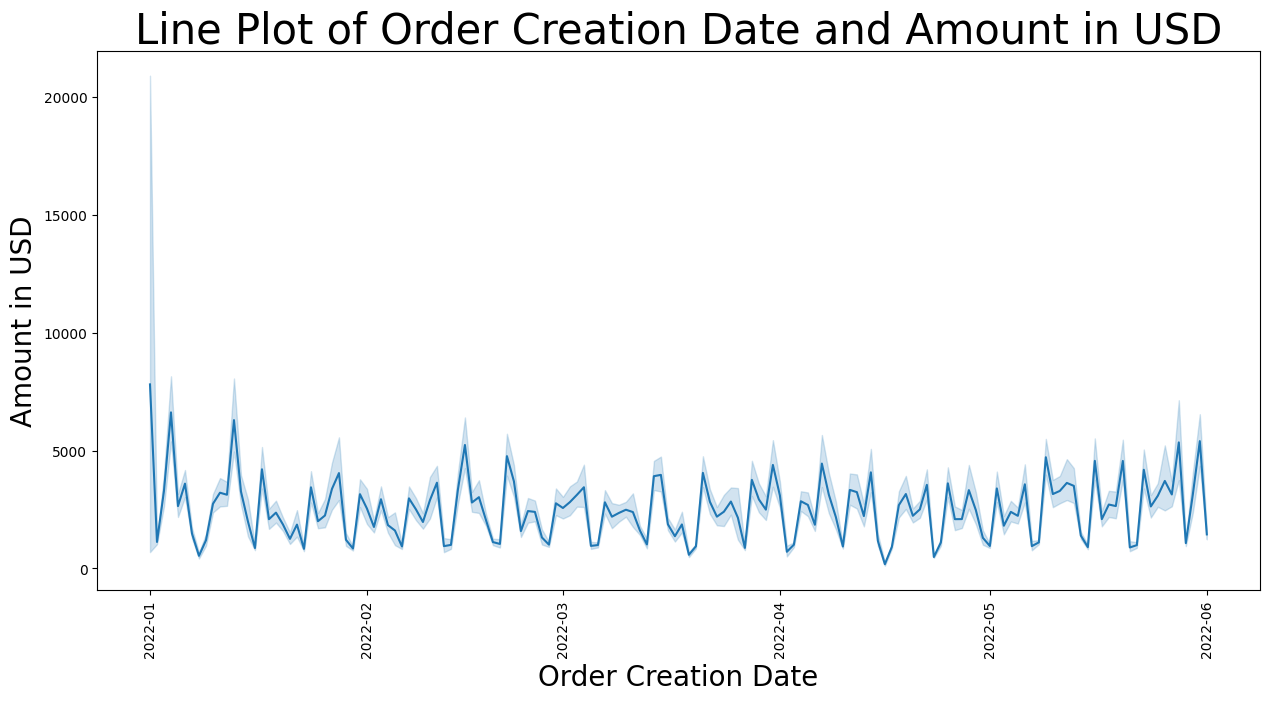

In [25]:
# Create a figure and set the figure size
plt.figure(figsize=(15, 7))

# Create a line plot of Order Creation Date vs Amount in USD
sns.lineplot(x='ORDER_CREATION_DATE', y='amount_in_usd', data=df)

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Order Creation Date', fontsize=20)
plt.ylabel('Amount in USD', fontsize=20)
plt.title('Line Plot of Order Creation Date and Amount in USD', fontsize=30)

# Rotate the x-axis tick labels and set font size
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()

##### Step 5: Create a boxplot on ORDER_AMOUNT to find out the outliers

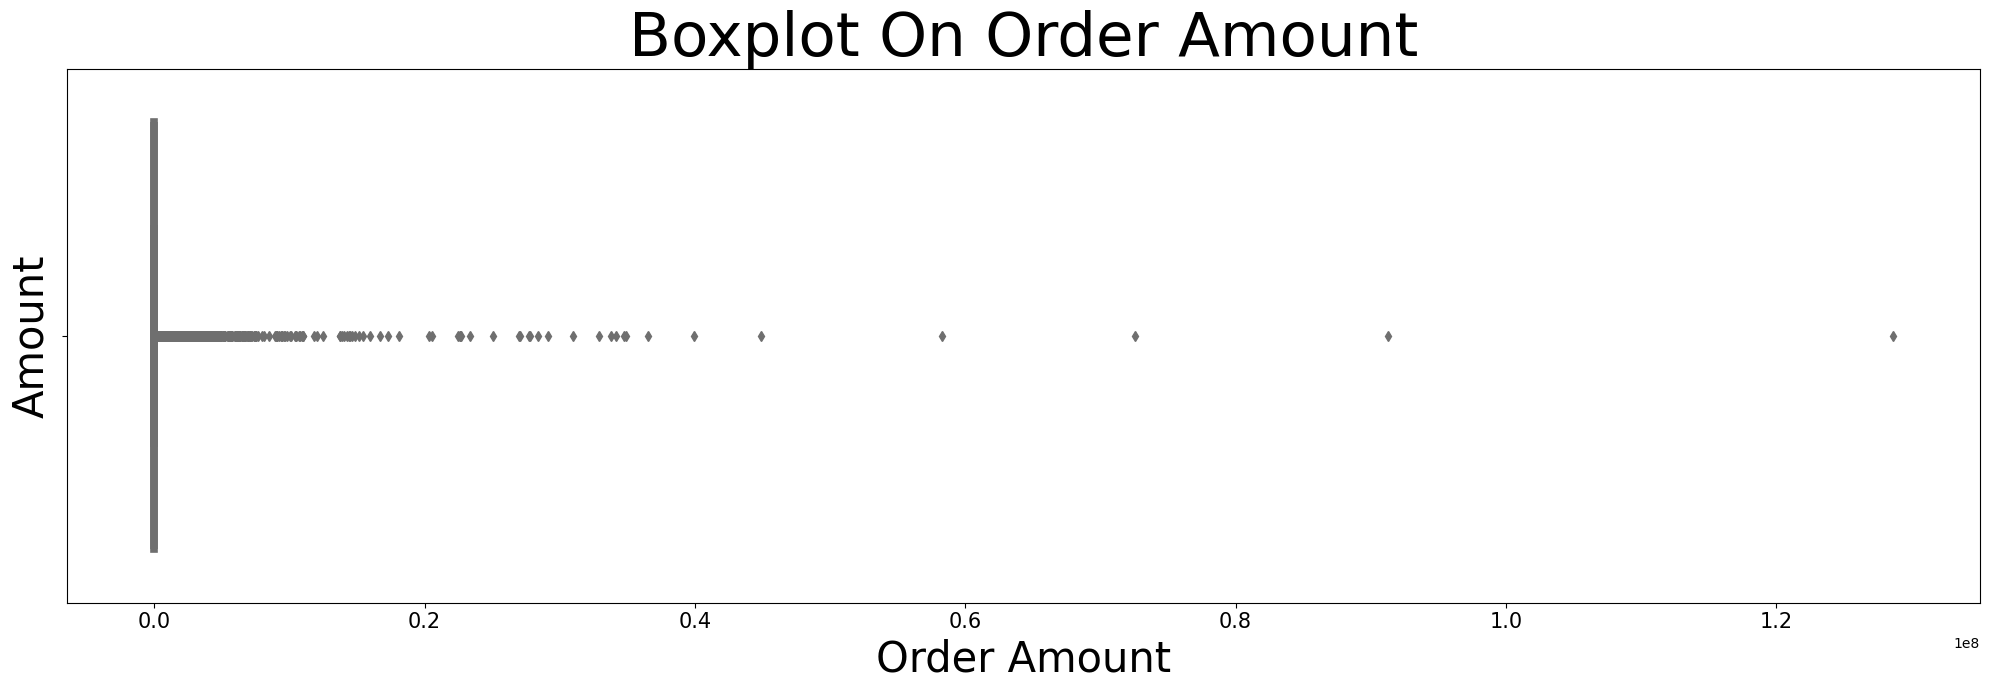

In [26]:
# Convert 'ORDER_AMOUNT' column to numeric
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

# Create a figure and set the figure size
plt.figure(figsize=(20, 7))

# Create a boxplot of Order Amount
sns.boxplot(x=df['ORDER_AMOUNT'], color='skyblue', linewidth=5.5)

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Order Amount', fontsize=30)
plt.ylabel('Amount', fontsize=30)
plt.title('Boxplot On Order Amount', fontsize=44)

# Set the x-axis tick font size
plt.xticks(fontsize=15)

# Adjust the layout of the plot
plt.tight_layout()

# Display the plot
plt.show()

##### Step 6: Create a barchart on COMPANY_CODE and ORDER_AMOUNT

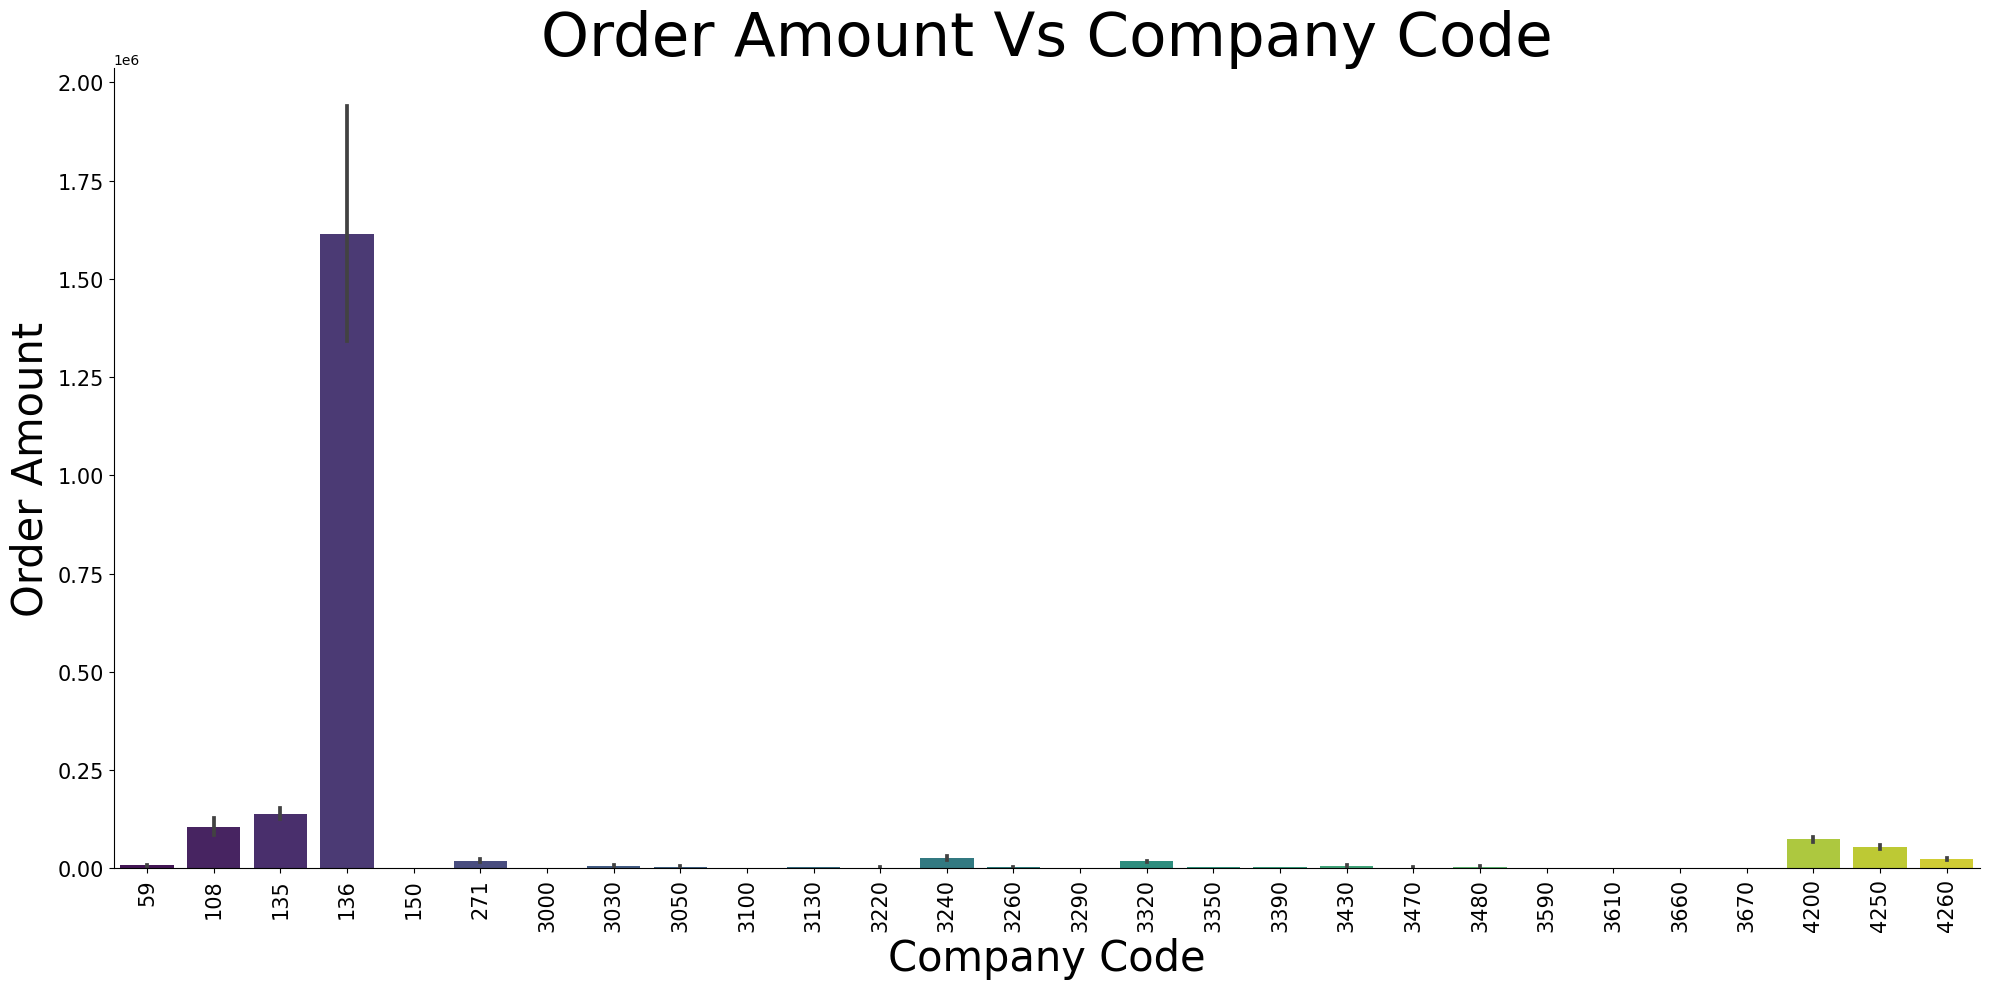

In [27]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot of Order Amount vs Company Code
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df, palette='viridis')

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Company Code', fontsize=30)
plt.ylabel('Order Amount', fontsize=30)
plt.title('Order Amount Vs Company Code', fontsize=44)

# Rotate the x-axis tick labels and set their font size
plt.xticks(rotation=90, fontsize=15)

# Set the font size of y-axis tick labels
plt.yticks(fontsize=15)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Adjust the layout of the plot
plt.tight_layout()

# Display the plot
plt.show()

### Milestone 3 - Feature Engineering and Selection

##### Step 1: Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

Replaced outliers:
         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
2                971991639       3238                   Moldova  South-Region   
8                821659852       2470  United States of America  South-Region   
34               811385935       4071             New Caledonia  South-Region   
59               761953719       3252                   Georgia  South-Region   
68               785805294       2182                  Djibouti  North-Region   
...                    ...        ...                       ...           ...   
1101916          856103636       2832             Guinea-Bissau  North-Region   
1101917          783964407       4054                 Swaziland  North-Region   
1101918          816646672       3734                 Argentina  North-Region   
1101920          853605710       2498                   Germany  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        

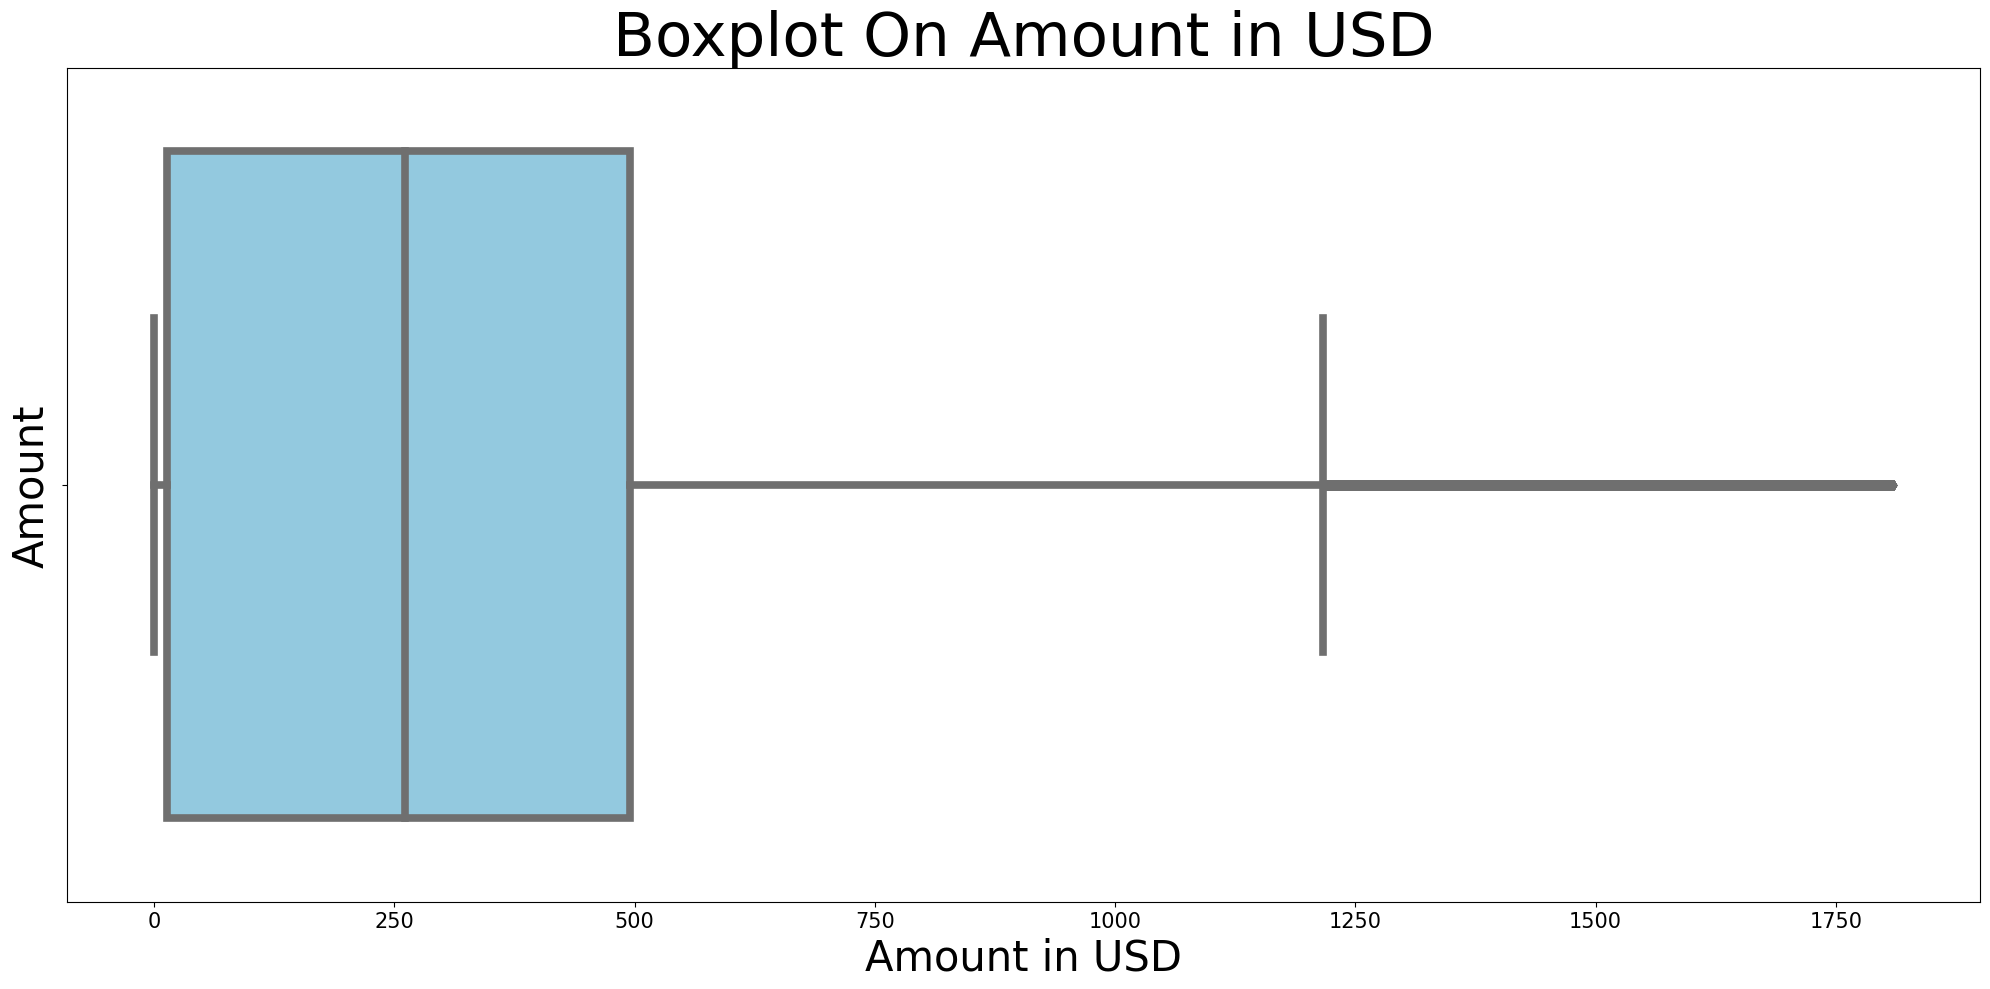

In [28]:
# Calculate the quartiles and IQR
Q1 = df['amount_in_usd'].quantile(0.25)  # lower quartile
Q3 = df['amount_in_usd'].quantile(0.75)  # upper quartile
IQR = Q3 - Q1  # interquartile range

# Calculate the lower and upper thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['amount_in_usd'] < lower_threshold) | (df['amount_in_usd'] > upper_threshold)]

# Replace outliers with the median
replace = df['amount_in_usd'].median()
df.loc[outliers.index, 'amount_in_usd'] = replace

# Print replaced outliers
print("Replaced outliers:")
print(outliers)

# Print the updated DataFrame after removing outliers
print("Updated DataFrame:")
print(df)

# Print the summary statistics after handling outliers
print("Summary Statistics:")
print(df['amount_in_usd'].describe())

# Print the number of outliers
print("Number of outliers:", len(outliers))

# Create a box plot of Amount in USD
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['amount_in_usd'], color='skyblue', linewidth=5.5)
plt.xlabel('Amount in USD', fontsize=30)
plt.ylabel('Amount', fontsize=30)
plt.title('Boxplot On Amount in USD', fontsize=44)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.show()

##### Step 2: Label encoding or One hot Encoding on all the categorical columns 

In [29]:
# Print the summary information of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1101924
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  object        
 3   DIVISION                 1074783 non-null  object        
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object        
 5   PURCHASE_ORDER_TYPE      1056093 non-null  object        
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  object        
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 12  

In [30]:
categorical = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'COMPANY_CODE']

# Initialize LabelEncoder instance
l = LabelEncoder()

# Encode categorical columns
for c in categorical:
    df[c] = l.fit_transform(df[c])

print(df)

# Convert 'unique_cust_id' and 'CUSTOMER_NUMBER' columns to float type
df['unique_cust_id'] = df['unique_cust_id'].astype(float)
df['CUSTOMER_NUMBER'] = df['CUSTOMER_NUMBER'].astype(float)

# Replace '-' and ',' in 'RELEASED_CREDIT_VALUE' column and convert it to float64 type
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].str.replace('-', '')
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].str.replace(',', '.')
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].astype('float64')

         CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                946851639       3537                   232         1   
1                963432061       3449                   135         1   
2                971991639       3238                   141         1   
3                754349803       3911                   228         1   
4                930253442       2381                    82         1   
...                    ...        ...                   ...       ...   
1101920          853605710       2498                    79         1   
1101921          998890898       4509                    10         1   
1101922          983330221       3951                   151         1   
1101923          926668029       3235                   167         1   
1101924          921701000       2968                   156         1   

        RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                    0     

##### Step 3: Log Transformations on continuous columns 

In [31]:
# Continuous columns for log transformation (skewed nd highly variable)
continuous_columns = ['RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT', 'amount_in_usd']

# Apply log transformation (log x+1) to handle 0 values
df[continuous_columns] = df[continuous_columns].applymap(lambda x: np.log2(x + 1))

##### Step 4: Try to extract new features by grouping existing columns 

In [32]:
# Creating a new feature column 'total_order_amount' by summing the 'ORDER_AMOUNT' for each 'COMPANY_CODE'
df['total_order_amount'] = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].transform('sum')
print(df['total_order_amount'])

0          529658.386558
1          529658.386558
2          115694.100610
3          155210.343741
4          155210.343741
               ...      
1101920     50454.435501
1101921     50454.435501
1101922     50454.435501
1101923     50454.435501
1101924     50454.435501
Name: total_order_amount, Length: 1074783, dtype: float64


##### Step 5: Create a heatmap to find correlation between the columns

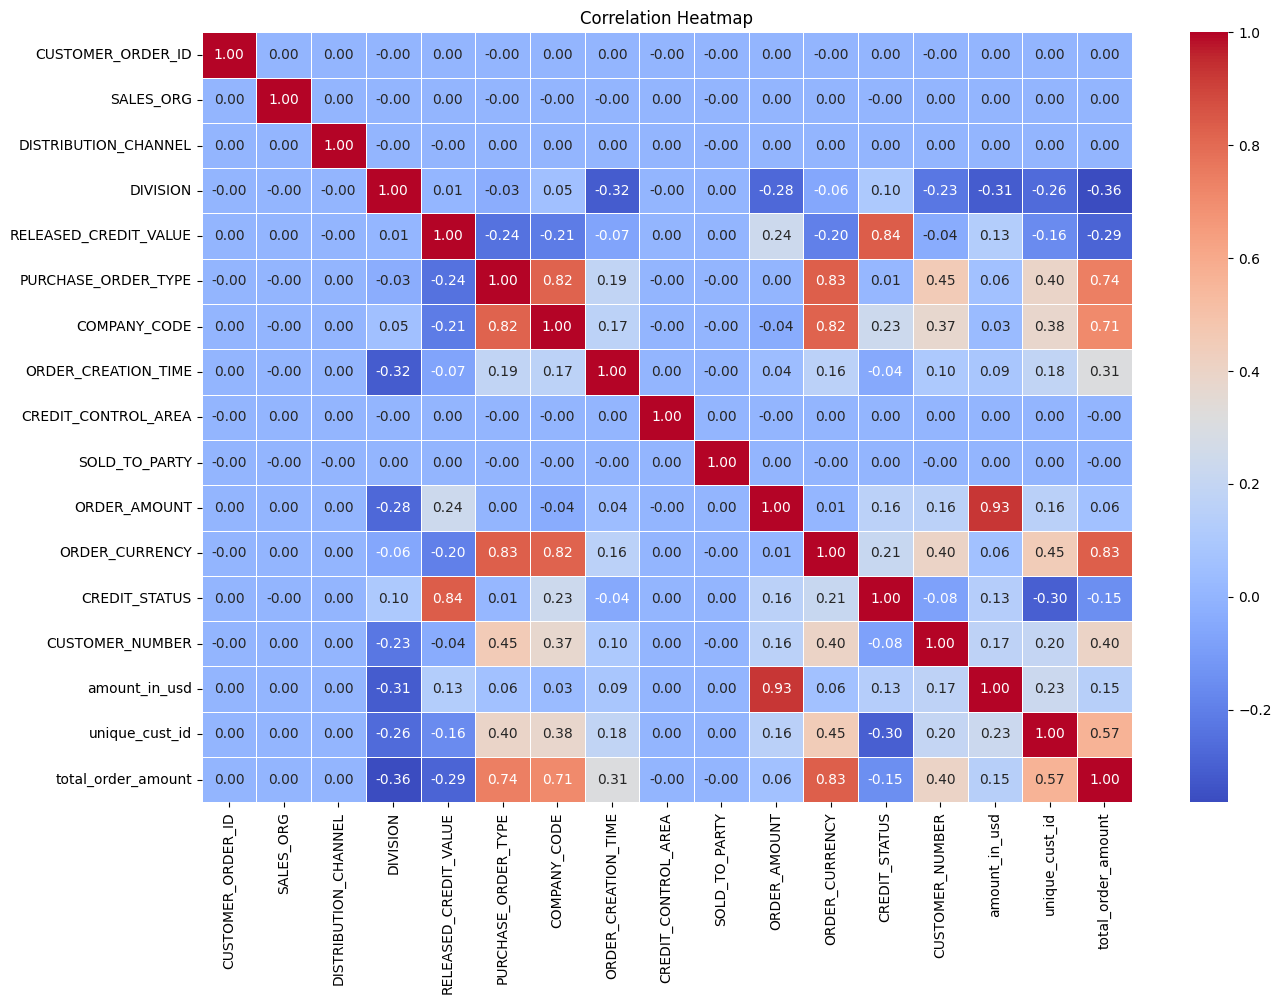

In [33]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### Step 6: Try to identify important or relevant columns for feature extraction

In [34]:
# Calculating the absolute correlation matrix
corr_matrix = df.corr().abs()

# Finding column pairs with correlation coefficient greater than 0.7
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Printing the relevant columns for feature extraction
print('Relevant columns for feature extraction:', high_corr_var)

Relevant columns for feature extraction: [('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'COMPANY_CODE'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('PURCHASE_ORDER_TYPE', 'total_order_amount'), ('COMPANY_CODE', 'ORDER_CURRENCY'), ('COMPANY_CODE', 'total_order_amount'), ('ORDER_AMOUNT', 'amount_in_usd'), ('ORDER_CURRENCY', 'total_order_amount')]


In [35]:
#- All of you Introduce a particular module (Link Attached) given by HRC , for datetime manipulation. 

def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):# function is define as given by hrc
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop = True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt
#the below code is written by me in order to pass values and return the result of melt 
# calling the function by assigning values to it
df = difference_in_days(df, lags=3, ffday=1, customer_id_col='unique_cust_id', create_date_col='ORDER_CREATION_DATE', net_amount_col='amount_in_usd') 
df

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                946851639       3537                   232         1   
1                963432061       3449                   135         1   
2                971991639       3238                   141         1   
3                754349803       3911                   228         1   
4                930253442       2381                    82         1   
...                    ...        ...                   ...       ...   
1074778          853605710       2498                    79         1   
1074779          998890898       4509                    10         1   
1074780          983330221       3951                   151         1   
1074781          926668029       3235                   167         1   
1074782          921701000       2968                   156         1   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                     0.000000                    0            11   
1                     0.000000                    0            11   
2                    16.329359                  204            13   
3                    10.523797                  255            14   
4                     0.000000                  255            14   
...                        ...                  ...           ...   
1074778               0.000000                  350            27   
1074779               0.000000                  350            27   
1074780               0.000000                  350            27   
1074781               0.000000                  350            27   
1074782               0.000000                  350            27   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  ...  \
0                2022-01-01                43012                    5  ...   
1                2022-01-01                43114                    2  ...   
2                2022-01-01               110019                    0  ...   
3                2022-01-01               153013                    5  ...   
4                2022-01-01               160020                    4  ...   
...                     ...                  ...                  ...  ...   
1074778          2022-06-01                74357                    1  ...   
1074779          2022-06-01                84052                    3  ...   
1074780          2022-06-01                85322                    0  ...   
1074781          2022-06-01                90538                    7  ...   
1074782          2022-06-01               113357                    1  ...   

         CUSTOMER_NUMBER  amount_in_usd unique_cust_id  total_order_amount  \
0           1.231181e+07      10.011198            0.0       529658.386558   
1           1.231181e+07       9.733607            1.0       529658.386558   
2           1.211876e+07       8.033423            0.0       115694.100610   
3           1.210500e+09      10.568890            0.0       155210.343741   
4           1.210351e+09       0.000000            0.0       155210.343741   
...                  ...            ...            ...                 ...   
1074778     1.210332e+09       8.033423           90.0        50454.435501   
1074779     1.210332e+09       0.000000           91.0        50454.435501   
1074780     1.210332e+09       0.000000          766.0        50454.435501   
1074781     1.210332e+09       0.000000          767.0        50454.435501   
1074782     1.210332e+09       8.033423           92.0        50454.435501   

         Last-1day_Sales  Last-2day_Sales  Last-3day_Sales  Last-1day_Diff  \
0               0.000000         0.000000         0.000000        0.000000   
1               0.000000         0.000000         0.000000        0.000000   
2              10.011198         0.000000         0.000000        0.000000   
3               8.033423        10.011198         0.000000       -1.977775   
4              10.568890         8.0334

### Milestone 4 - ML Models and Evaluations

##### Step 1: Modify the dataset to pass into any type of machine learning models. 

In [36]:
# show all the column with datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074783 entries, 0 to 1074782
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  int32         
 3   DIVISION                 1074783 non-null  int32         
 4   RELEASED_CREDIT_VALUE    1074783 non-null  float64       
 5   PURCHASE_ORDER_TYPE      1074783 non-null  int32         
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  int32         
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 12  

In [37]:
# Selected columns for feature selection
selected_col = ['DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE',
                'total_order_amount', 'Last-1day_Sales', 'Last-2day_Sales',
                'Last-3day_Sales', 'Last-1day_Diff', 'Last-2day_Diff',
                'Last-3day_Diff','ORDER_AMOUNT']

# Extracting the selected columns as features (X) and the target variable (y)
X = df[selected_col]
y = df['amount_in_usd']

# Dropping features that don't have much impact on accuracy
# Explanation: These features were dropped as they didn't contribute significantly to the accuracy of the model.
# By removing them, we can simplify the model and improve computational efficiency.
X = X.drop(['PURCHASE_ORDER_TYPE', 'Last-3day_Diff'], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=300)

##### Step 2: Try different machine learning models like - 
                a). Linear Regression
                b). Support Vector Machine 
                c). Decision Tree
                d). Random Forest 
                e). AdaBoost
                f). Xgboost etc.

In [38]:
# Initializing models
lr = LinearRegression()              # Linear regression model
dt = DecisionTreeRegressor()         # Decision tree model
ada = AdaBoostRegressor()            # AdaBoost model
xgb = XGBRegressor()                 # XGBoost model
knn = KNeighborsRegressor()          # K-Nearest Neighbors model

# Training for each model
lr.fit(X_train, y_train)             # Train linear regression model
dt.fit(X_train, y_train)             # Train decision tree model
ada.fit(X_train, y_train)            # Train AdaBoost model
xgb.fit(X_train, y_train)            # Train XGBoost model
knn.fit(X_train, y_train)            # Train K-Nearest Neighbors model

# Prediction for each model
y_pred_lr = lr.predict(X_test)       # Predict using linear regression model
y_pred_dt = dt.predict(X_test)       # Predict using decision tree model
y_pred_ada = ada.predict(X_test)     # Predict using AdaBoost model
y_pred_xgb = xgb.predict(X_test)     # Predict using XGBoost model
y_pred_knn = knn.predict(X_test)     # Predict using K-Nearest Neighbors model

##### Step 3: Try different machine learning models like - Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [39]:
# Linear Regression
lr_mse_test = mean_squared_error(y_test, y_pred_lr) # Calculate Mean Squared Error for Linear Regression model
lr_rmse_test = np.sqrt(lr_mse_test)                      # Calculate Root Mean Squared Error for Linear Regression model
lr_r2_test = r2_score(y_test, y_pred_lr)             # Calculate R-Squared score for Linear Regression model

# Decision Tree
dt_mse_test = mean_squared_error(y_test, y_pred_dt) # Calculate Mean Squared Error for Decision Tree model
dt_rmse_test = np.sqrt(dt_mse_test)                      # Calculate Root Mean Squared Error for Decision Tree model
dt_r2_test = r2_score(y_test, y_pred_dt)             # Calculate R-Squared score for Decision Tree model

# AdaBoost
ada_mse_test = mean_squared_error(y_test, y_pred_ada) # Calculate Mean Squared Error for AdaBoost model
ada_rmse_test = np.sqrt(ada_mse_test)                      # Calculate Root Mean Squared Error for AdaBoost model
ada_r2_test = r2_score(y_test, y_pred_ada)             # Calculate R-Squared score for AdaBoost model

# XGBoost
xgb_mse_test = mean_squared_error(y_test, y_pred_xgb) # Calculate Mean Squared Error for XGBoost model
xgb_rmse_test = np.sqrt(xgb_mse_test)                      # Calculate Root Mean Squared Error for XGBoost model
xgb_r2_test = r2_score(y_test, y_pred_xgb)             # Calculate R-Squared score for XGBoost model

# K-Nearest Neighbors (KNN)
knn_mse_test = mean_squared_error(y_test, y_pred_knn) # Calculate Mean Squared Error for K-Nearest Neighbors (KNN) model
knn_rmse_test = np.sqrt(knn_mse_test)                      # Calculate Root Mean Squared Error for K-Nearest Neighbors (KNN) model
knn_r2_test = r2_score(y_test, y_pred_knn)             # Calculate R-Squared score for K-Nearest Neighbors (KNN) model


##### Step 4: Compare the accuracies of all the models 

In [40]:
# List of model names
models = ['Linear Regression', 'Decision Tree', 'AdaBoost', 'XGBoost', 'KNN']

# List of MSE values for each model
mse_values = [lr_mse_test, dt_mse_test, ada_mse_test, xgb_mse_test, knn_mse_test]

# List of RMSE values for each model
rmse_values = [lr_rmse_test, dt_rmse_test, ada_rmse_test, xgb_rmse_test, knn_rmse_test]

# List of R-squared values for each model
r2_values = [lr_r2_test, dt_r2_test, ada_r2_test, xgb_r2_test, knn_r2_test]

# Creating a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({'Model': models,
                           'MSE': mse_values,
                           'RMSE': rmse_values,
                           'R-squared': r2_values})

# Printing the metrics DataFrame
metrics_df

Model       MSE      RMSE  R-squared
0  Linear Regression  1.699954  1.303823   0.874274
1      Decision Tree  0.004107  0.064088   0.999696
2           AdaBoost  0.540130  0.734935   0.960053
3            XGBoost  0.002946  0.054277   0.999782
4                KNN  0.058908  0.242709   0.995643

##### Step 5: Select the best possible model

In [41]:
# Sort the metrics DataFrame based on MSE in ascending order (change the metric as needed)
sorted_metrics_df = metrics_df.sort_values(by=['MSE'], ascending=True)

# Get the best model based on the sorted DataFrame
best_model = sorted_metrics_df.iloc[0]

# Print the sorted metrics DataFrame and the best model
print("\nSorted Metrics:")
print(sorted_metrics_df)

print("\nBest Model:")
print(best_model)


Sorted Metrics:
               Model       MSE      RMSE  R-squared
3            XGBoost  0.002946  0.054277   0.999782
1      Decision Tree  0.004107  0.064088   0.999696
4                KNN  0.058908  0.242709   0.995643
2           AdaBoost  0.540130  0.734935   0.960053
0  Linear Regression  1.699954  1.303823   0.874274

Best Model:
Model         XGBoost
MSE          0.002946
RMSE         0.054277
R-squared    0.999782
Name: 3, dtype: object


##### Step 6: Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

In [42]:
# Get the best model based on the sorted DataFrame
best_model = sorted_metrics_df['Model'].iloc[0]

# Perform hyperparameter tuning for the best model
if best_model == 'Linear Regression':
    # Define the parameter grid for Linear Regression
    param_grid = {
        'normalize': [True, False]
    }
    model = LinearRegression()
elif best_model == 'Decision Tree':
    # Define the parameter grid for Decision Tree
    param_grid = {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = DecisionTreeRegressor()
elif best_model == 'AdaBoost':
    # Define the parameter grid for AdaBoost
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1.0]
    }
    model = AdaBoostRegressor()
elif best_model == 'XGBoost':
    # Define the parameter grid for XGBoost
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1.0]
    }
    model = XGBRegressor()
elif best_model == 'KNN':
    # Define the parameter grid for KNN
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    model = KNeighborsRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the best hyperparameters and model performance
print("Best Model:", best_model)
print("Best Hyperparameters:", best_params)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
MSE: 0.0020822385154456624
RMSE: 0.04563155175364588
R2 Score: 0.9998460005507365


##### Step 7: Come up with the best possible model accuracy.

In [43]:
# Get the best model based on the sorted DataFrame before tuning
best_model_before_tuning = sorted_metrics_df.iloc[0]

# Evaluate the model after tuning
mse_after_tuning = mean_squared_error(y_test, predictions)
rmse_after_tuning = np.sqrt(mse_after_tuning)
r2_after_tuning = r2_score(y_test, predictions)

# Create a DataFrame to compare the model performance before and after tuning
performance_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2 Score'],
    'Before Tuning': [best_model_before_tuning['MSE'], best_model_before_tuning['RMSE'], best_model_before_tuning['R-squared']],
    'After Tuning': [mse_after_tuning, rmse_after_tuning, r2_after_tuning]
})

# Calculate percentage change for each metric
performance_df['% Change'] = 100 * (performance_df['After Tuning'] - performance_df['Before Tuning']) / performance_df['Before Tuning']

# Print the model performance comparison
print("Model Performance Comparison:")
print(performance_df.to_string(index=False))


Model Performance Comparison:
  Metric  Before Tuning  After Tuning   % Change
     MSE       0.002946      0.002082 -29.319311
    RMSE       0.054277      0.045632 -15.928192
R2 Score       0.999782      0.999846   0.006389
